### Daily Global Historical Climatology Network (GHCN).
<br>

#### General setup.
___

In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

%matplotlib inline

In [2]:
# Plot style
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Retrieve the data.
___

In [3]:
# Retrieve weather data
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', '../Data/stations.txt')

In [4]:
# Check the first 10 lines of the data
open('../Data/stations.txt', 'r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [5]:
# Create a dictionary of stations (where GSN is in)
stations = {}

for line in open('../Data/stations.txt', 'r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]] = ' '.join(fields[4:])

In [6]:
len(stations)

994

In [7]:
def find_stations(s):
    """ Function that looks for a station by its name """
    found = {code: name for code, name in stations.items() if s in name}
    print(found)

<br>

#### Explore 4 stations: Lihue, San Diego, Irkutsk, Minneapolis. 
___

In [8]:
find_stations('LIHUE')
find_stations('SAN DIEGO')
find_stations('IRKUTSK')
find_stations('MINNEAPOLIS')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}
{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}
{'RSM00030710': 'IRKUTSK GSN 30710'}
{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [9]:
# Create a list of city codes for further exploration.
data_stations = ['USW00022536', 'USW00023188', 'RSM00030710', 'USW00014922']

In [10]:
# Check the observations for Lihue
open('../Data/USW00022536.dly', 'r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [11]:
# Check readme file for information on data.
open('../Data/readme.txt', 'r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [12]:
def parse_file(file):
    """ Function to parse data in a better format """
    return np.genfromtxt(file, 
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [13]:
# Parameters for the above function
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4 * i for i in range(1,32)]
dly_dtype = [np.int32, np.int32, (np.str_, 4)] + [np.int32] * 31
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1,31+1)]

In [14]:
lihue = parse_file('../Data/USW00022536.dly')
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

In [15]:
def unroll(record):
    """ Function for making further changes into data parsing
    since each month has a different number of days"""
    
    # Create a range of dates that corresponde to each row 
    # First create a beginning of the month
    start_date = np.datetime64('{}-{:02}'.format(record["year"], record["month"]))
    
    # Create a range by stepping one month and 1 day
    dates = np.arange(start_date, start_date + np.timedelta64(1, 'M'), 
                      np.timedelta64(1, 'D'))
    
    # Collect the data for the days
    # convert since the temperature shown in 10th of degrees 
    row = [(date, record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    # Change the data types of each row
    return np.array(row, dtype=[('date', 'M8[D]'), ('value', 'd')])

In [16]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [17]:
def get_obs(file, obs):
    """ Function to concatenate the observations into a single numpy array """
    return np.concatenate([unroll(row) for row in parse_file(file) 
                           if row[2] == obs])

In [18]:
# Get min temperature in Lihue
get_obs('../Data/USW00022536.dly', 'TMIN')

array([('1950-02-01',   17.8), ('1950-02-02',   15.6),
       ('1950-02-03',   16.1), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

<br>

#### Integrating missing data.
___

In [19]:
lihue_tmin = get_obs('../Data/USW00022536.dly', 'TMIN')
lihue_tmax = get_obs('../Data/USW00022536.dly', 'TMAX')

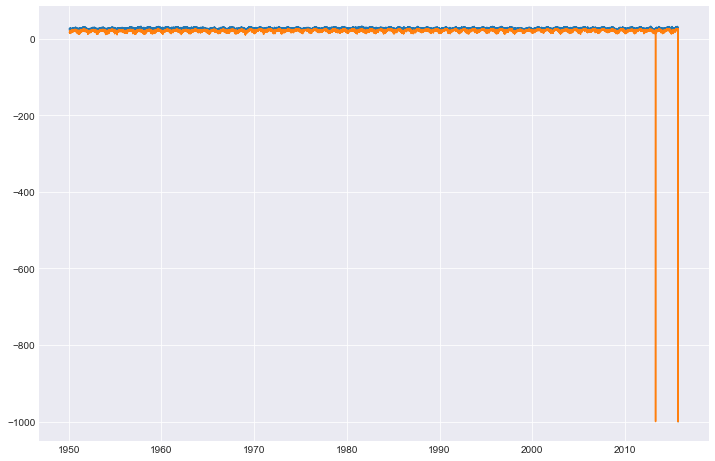

In [20]:
plt.plot(lihue_tmax['date'], lihue_tmax['value'])
plt.plot(lihue_tmin['date'], lihue_tmin['value']);

The plot above includes the values that are incorrect such as -999.9 which need to be masked as NaN values.

In [21]:
# Amend the function to introduce NaN values.
def get_obs(file, obs):
    data =  np.concatenate([unroll(row) for row in parse_file(file) 
                           if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [22]:
lihue_tmin = get_obs('../Data/USW00022536.dly', 'TMIN')
lihue_tmax = get_obs('../Data/USW00022536.dly', 'TMAX')

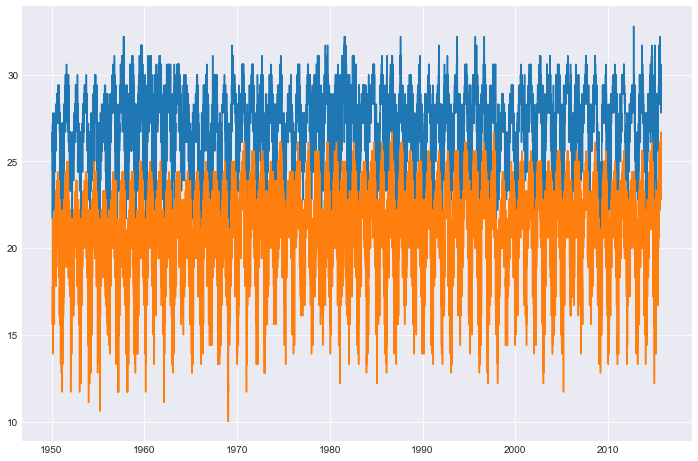

In [23]:
plt.plot(lihue_tmax['date'], lihue_tmax['value'])
plt.plot(lihue_tmin['date'], lihue_tmin['value']);

In [24]:
np.mean(lihue_tmax['value']), np.mean(lihue_tmin['value'])

(nan, nan)

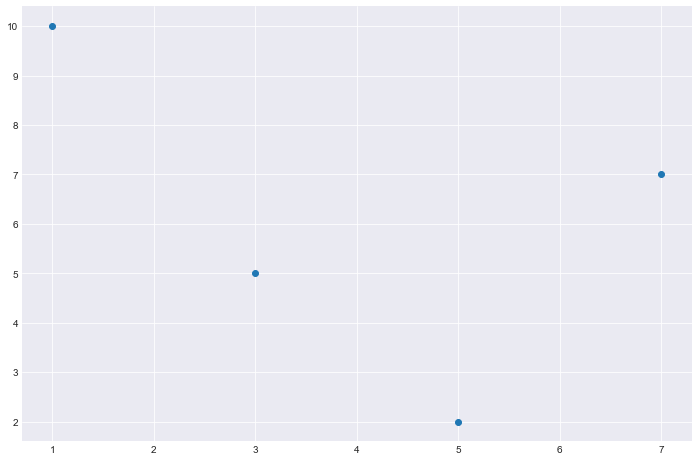

In [25]:
# Make 2 arrays with 4 data points
x = np.array([1,3,5,7], 'd')
y = np.array([10,5,2,7], 'd')

plt.plot(x,y, 'o');

To make up plausible data points between the existing is to draw straight line between the points and use values on those straight lines. 

In [26]:
xs = np.linspace(1,7)

In [27]:
ys = np.interp(xs,x,y)

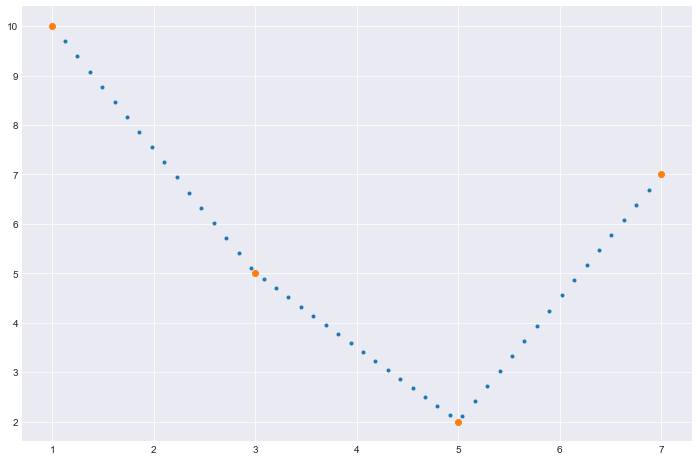

In [28]:
plt.plot(xs,ys, '.')
plt.plot(x,y,'o');

Now we can do the same for the temperature data.

In [29]:
def fillnans(data):
    """ Function for data interpolation of temperature """
    
    # Change the date format from M8B to float
    dates_format = data['date'].astype(np.float64)
    
    # Locate all nan values
    nan = np.isnan(data['value'])
    
    # replace them in interpreted data.
    data['value'][nan] = np.interp(dates_format[nan], dates_format[~nan], data['value'][~nan])

In [30]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

In [31]:
# Now we can get temperature min and max
np.mean(lihue_tmax['value']), np.mean(lihue_tmin['value'])

(27.300908977192176, 21.051530250594173)

<br>

#### Smoothing data.
___

Even though missing values are replaced, the data still requires further work since it is quite noisy. We can do it by averaging the nearby numbers (running mean).

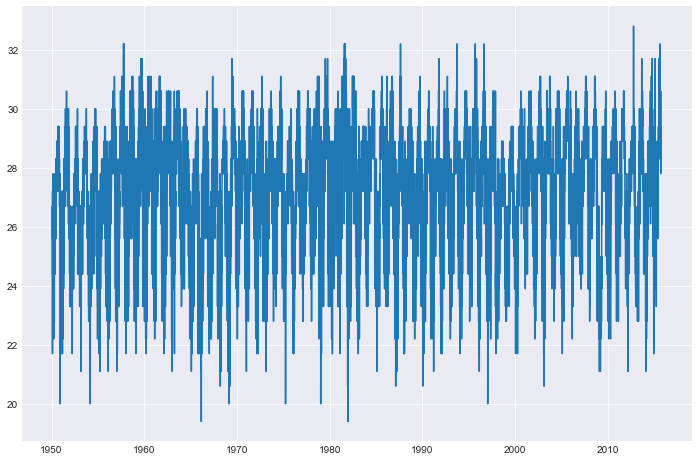

In [32]:
plt.plot(lihue_tmax['date'], lihue_tmax['value']);

In [33]:
def plot_smoothed(t, win=10):
    """ Function for smoothing data by finding a rolling average """
    
    # Create a shorter array of the same size
    smoothed = np.correlate(t['value'], np.ones(win)/win,'same')
    
    # Plot the data
    plt.plot(t['date'], smoothed)

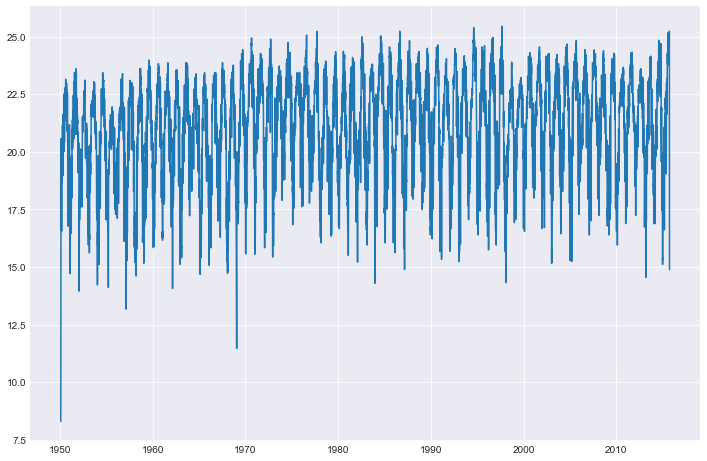

In [34]:
plot_smoothed(lihue_tmin)

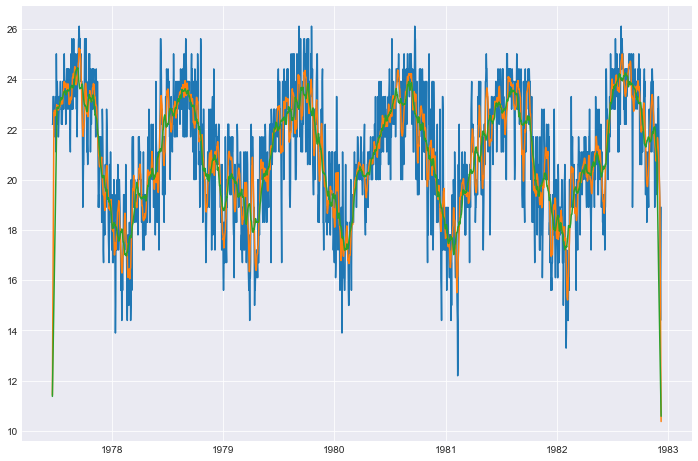

In [35]:
# Plot together unsmoothed and smoothed data
# by looking at smaller size of the arrays
plt.plot(lihue_tmin[10000:12000]['date'], lihue_tmin[10000:12000]['value'])
plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30);

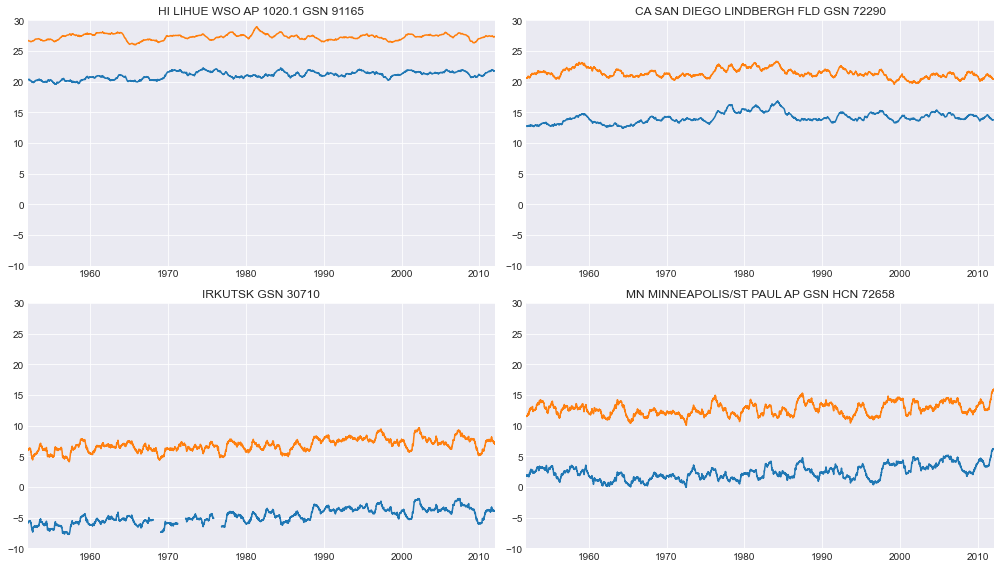

In [36]:
# Increase the size of the plot
plt.figure(figsize= (14,8))

# Plot smoothed data for all stations
for i,code in enumerate(data_stations):
    plt.subplot(2,2,i+1)
    plt.title(stations[code])
    
    # with increased smoothing parameter
    plot_smoothed(get_obs(f'../Data/{code}.dly', 'TMIN'), 365)
    plot_smoothed(get_obs(f'../Data/{code}.dly', 'TMAX'), 365)
    
    # Set axis limits
    plt.axis(xmin=np.datetime64('1952'), 
             xmax=np.datetime64('2012'),
             ymin=-10, ymax=30)
    
plt.tight_layout()

<br>

#### Computing daily records.
___


In [37]:
# Recast the records into a form of two dimentional array

def extract_year(data, year):
    """ Function that extracts temperature for one year"""
    
    start = np.datetime64(f'{year}')
    end = start + np.timedelta64(1, 'Y')
    
    return data[(data['date']>= start) & (data['date']<= end)]['value']

In [38]:
extract_year(lihue_tmin, 2015)

array([15.  , 15.  , 13.3 , 12.2 , 13.9 , 18.3 , 18.3 , 16.7 , 16.1 ,
       18.9 , 17.2 , 15.6 , 16.7 , 19.4 , 20.  , 18.9 , 18.9 , 19.4 ,
       18.3 , 17.8 , 18.3 , 19.4 , 20.6 , 18.9 , 19.4 , 20.  , 20.  ,
       17.2 , 18.3 , 16.7 , 14.4 , 17.8 , 20.  , 22.2 , 21.7 , 16.1 ,
       15.  , 14.4 , 16.7 , 20.6 , 18.9 , 15.6 , 16.1 , 21.7 , 15.6 ,
       14.4 , 16.1 , 18.3 , 18.9 , 20.6 , 18.9 , 16.1 , 21.7 , 21.1 ,
       21.1 , 23.3 , 20.  , 18.3 , 20.6 , 20.  , 22.2 , 22.2 , 19.4 ,
       18.9 , 18.3 , 18.3 , 16.7 , 15.  , 13.9 , 16.7 , 17.2 , 15.  ,
       20.  , 18.3 , 17.2 , 16.1 , 18.3 , 19.4 , 21.7 , 21.7 , 22.8 ,
       21.7 , 18.9 , 20.  , 20.6 , 22.2 , 22.2 , 22.2 , 22.2 , 20.  ,
       20.  , 21.7 , 19.4 , 23.3 , 22.8 , 22.2 , 20.6 , 22.2 , 20.6 ,
       21.1 , 22.2 , 21.1 , 20.6 , 22.2 , 22.8 , 22.2 , 22.8 , 23.3 ,
       22.8 , 22.8 , 20.6 , 21.1 , 21.7 , 22.8 , 23.3 , 21.7 , 21.7 ,
       21.7 , 23.3 , 20.6 , 22.8 , 22.8 , 22.8 , 23.3 , 22.2 , 22.2 ,
       22.8 , 22.2 ,

In [39]:
# Arrange all years in a matrix for minimums
lihue_tmin_all = np.vstack([extract_year(lihue_tmin, year)[:365]
                           for year in range(1951, 2015)])

In [40]:
lihue_tmin_all

array([[17.8, 17.8, 17.2, ..., 20.6, 19.4, 18.9],
       [17.2, 19.4, 21.7, ..., 21.7, 20.6, 17.8],
       [17.8, 18.3, 19.4, ..., 13.3, 15. , 15. ],
       ...,
       [17.8, 17.2, 17.8, ..., 18.3, 18.9, 19.4],
       [20. , 20. , 19.4, ..., 19.4, 20. , 18.3],
       [17.8, 20. , 17.8, ..., 18.9, 16.1, 14.4]])

In [41]:
lihue_tmin_all.shape

(64, 365)

In [42]:
lihue_tmin_minrecords = np.min(lihue_tmin_all, axis=0)
lihue_tmin_maxrecords = np.max(lihue_tmin_all, axis=0)

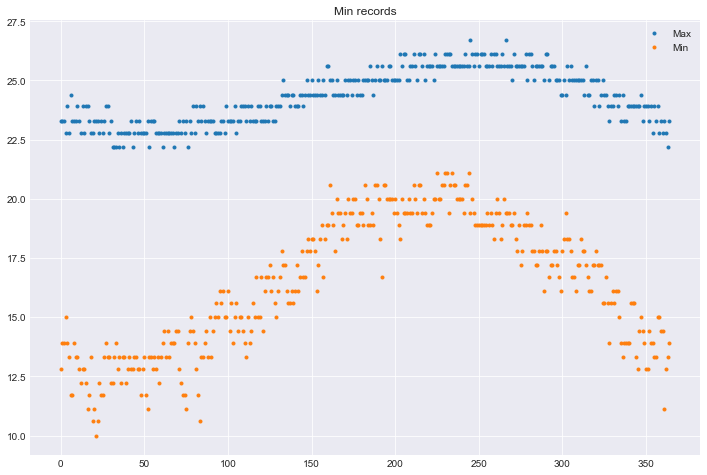

In [43]:
plt.plot(lihue_tmin_maxrecords, '.', label='Max')
plt.plot(lihue_tmin_minrecords, '.', label='Min')
plt.legend()
plt.title('Min records');

In [44]:
# Stacked array of all maximums of temperature
lihue_tmax_all = np.vstack([extract_year(lihue_tmax, year)[:365]
                           for year in range(1951, 2015)])

In [45]:
lihue_tmax_minrecords = np.min(lihue_tmax_all, axis=0)
lihue_tmax_maxrecords = np.max(lihue_tmax_all, axis=0)

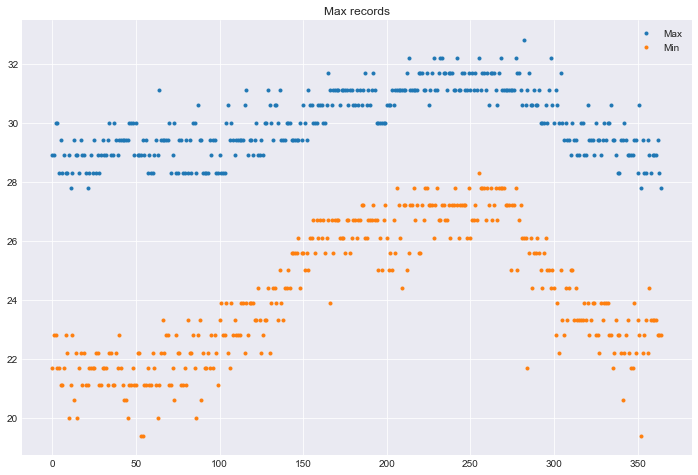

In [46]:
plt.plot(lihue_tmax_maxrecords, '.', label='Max')
plt.plot(lihue_tmax_minrecords, '.', label='Min')
plt.legend()
plt.title('Max records');

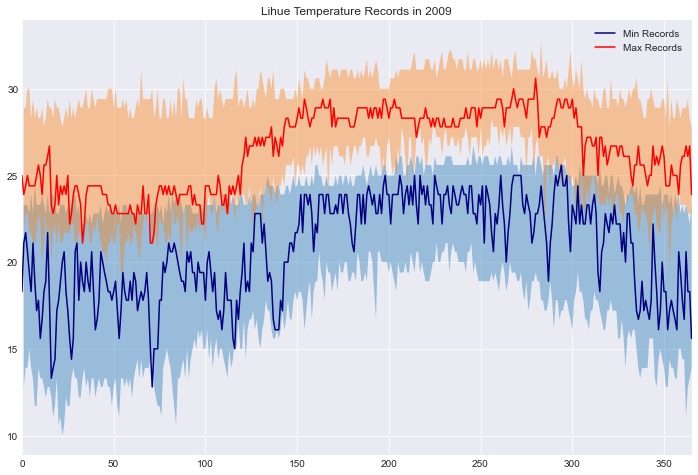

In [47]:
# Plot min temperatures in Lihue in 2009 over the min and max values 
days = np.arange(1,366)
plt.fill_between(days, lihue_tmin_minrecords, lihue_tmin_maxrecords, alpha=0.4)
plt.plot(extract_year(lihue_tmin, 2009), c='navy', label='Min Records')

plt.fill_between(days, lihue_tmax_minrecords, lihue_tmax_maxrecords, alpha=0.4)
plt.plot(extract_year(lihue_tmax, 2009), c='r', label='Max Records')

plt.axis(xmin=0,xmax=365)
plt.legend()
plt.title('Lihue Temperature Records in 2009');

<br>

___

#### End.